In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

#### Peeking how to implement pdf function

In [2]:
print(inspect.getsource(scipy.stats.norm._pdf))

print(inspect.getsource(scipy.stats.gamma._pdf))

    def _pdf(self, x):
        # norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
        return _norm_pdf(x)

    def _pdf(self, x, a):
        # gamma.pdf(x, a) = x**(a-1) * exp(-x) / gamma(a)
        return np.exp(self._logpdf(x, a))



## Plotting Likelihood, Prior, and Posterior

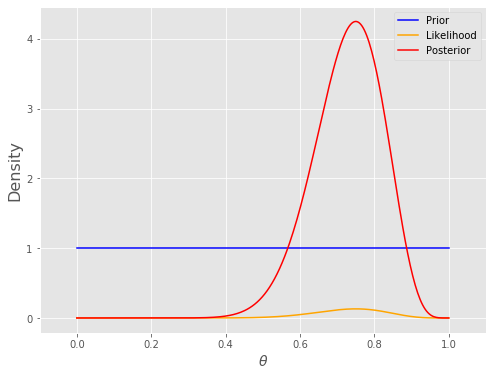

In [3]:
# Likelihood
n = 20
y = 15

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

# Prior
a0 = 1
b0 = 1
prior = st.beta(a=a0, b=b0)

# Posterior
post = st.beta(a=a0+y, b=b0+(n-y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**4)*likelihood(thetas, n, y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Example 1) BDA p.37

In [4]:
plt.rc('font', size=12)

# grid (theta)
x = np.linspace(0.375, 0.525, 150)

# posterior with data (y, n-y) = (437, 543) and uniform prior Beta(1,1)
au = 438
bu = 544

# calculate densities
pdu = st.beta.pdf(x, au, bu)

# compare 3 cases
# arrays of differnt priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])

# corresponding posteriors with data (437, 543)
ai = 437 + ap
bi = 543 + bp

# calculate prior and posterior densities
pdp = st.beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = st.beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

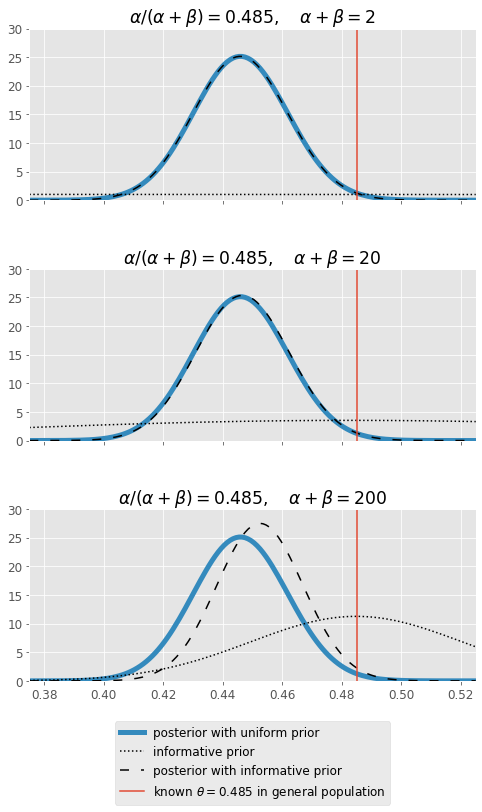

In [5]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))

# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color='C1', linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6,8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -.2)
);

## HW
### 1

In [6]:
# Likelihood
weak_n = 15
weak_y = 4

strong_n = 50
strong_y = 35

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

# Prior
non_a0 = 1
non_b0 = 1

weak_a0 = 4
weak_b0 = 2

strong_a0 = 16
strong_b0 = 9

#### Noninformative prior & weak likelihood

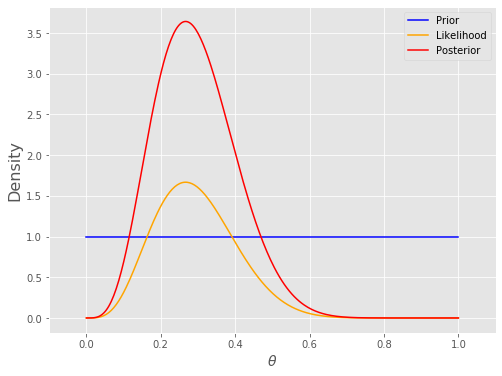

In [7]:
prior = st.beta(a=non_a0, b=non_b0)

# Posterior
post = st.beta(a=non_a0+weak_y, b=non_b0+(weak_n-weak_y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**4)*likelihood(thetas, weak_n, weak_y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Noninformative prior & strong likelihood

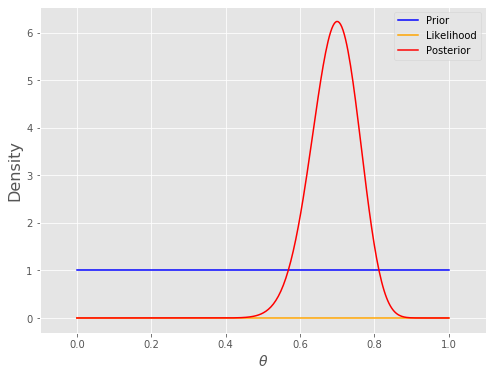

In [8]:
prior = st.beta(a=non_a0, b=non_b0)

# Posterior
post = st.beta(a=non_a0+strong_y, b=non_b0+(strong_n-strong_y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**4)*likelihood(thetas, strong_n, strong_y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Weak prior & weak likelihood

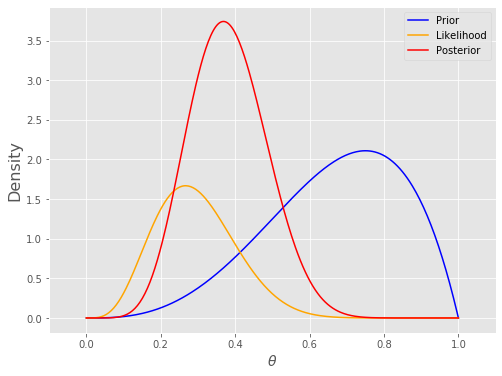

In [9]:
prior = st.beta(a=weak_a0, b=weak_b0)

# Posterior
post = st.beta(a=weak_a0+weak_y, b=weak_b0+(weak_n-weak_y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**4)*likelihood(thetas, weak_n, weak_y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Weak prior & strong likelihood

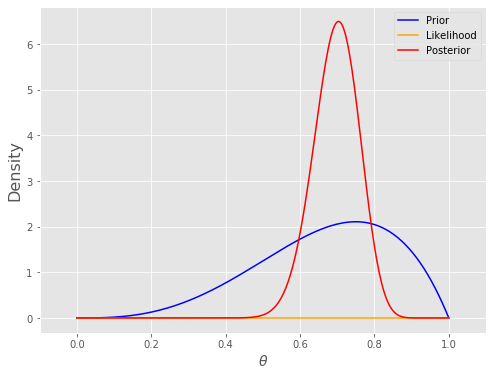

In [10]:
prior = st.beta(a=weak_a0, b=weak_b0)

# Posterior
post = st.beta(a=weak_a0+strong_y, b=weak_b0+(strong_n-strong_y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**4)*likelihood(thetas, strong_n, strong_y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Strong prior & weak likelihood

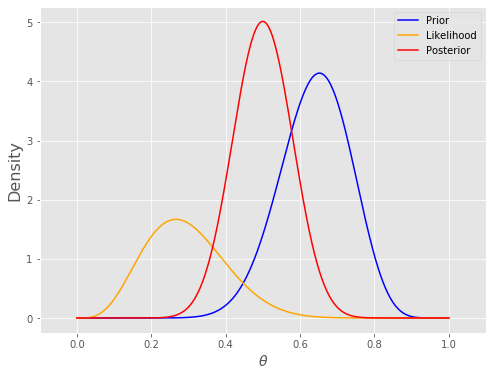

In [11]:
prior = st.beta(a=strong_a0, b=strong_b0)

# Posterior
post = st.beta(a=strong_a0+weak_y, b=strong_b0+(weak_n-weak_y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**4)*likelihood(thetas, weak_n, weak_y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

#### Strong prior & strong likelihood

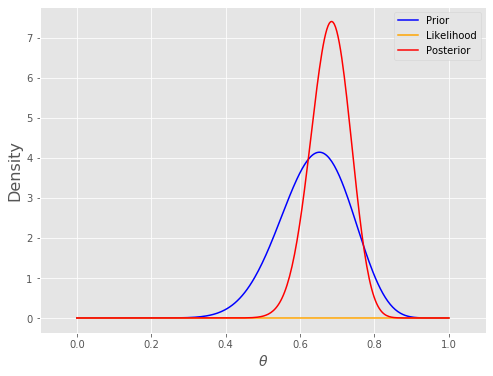

In [12]:
prior = st.beta(a=strong_a0, b=strong_b0)

# Posterior
post = st.beta(a=strong_a0+strong_y, b=strong_b0+(strong_n-strong_y))

# plotting
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, (10**4)*likelihood(thetas, strong_n, strong_y), label='Likelihood', c='orange')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

### 2

In [13]:
from IPython.display import Image

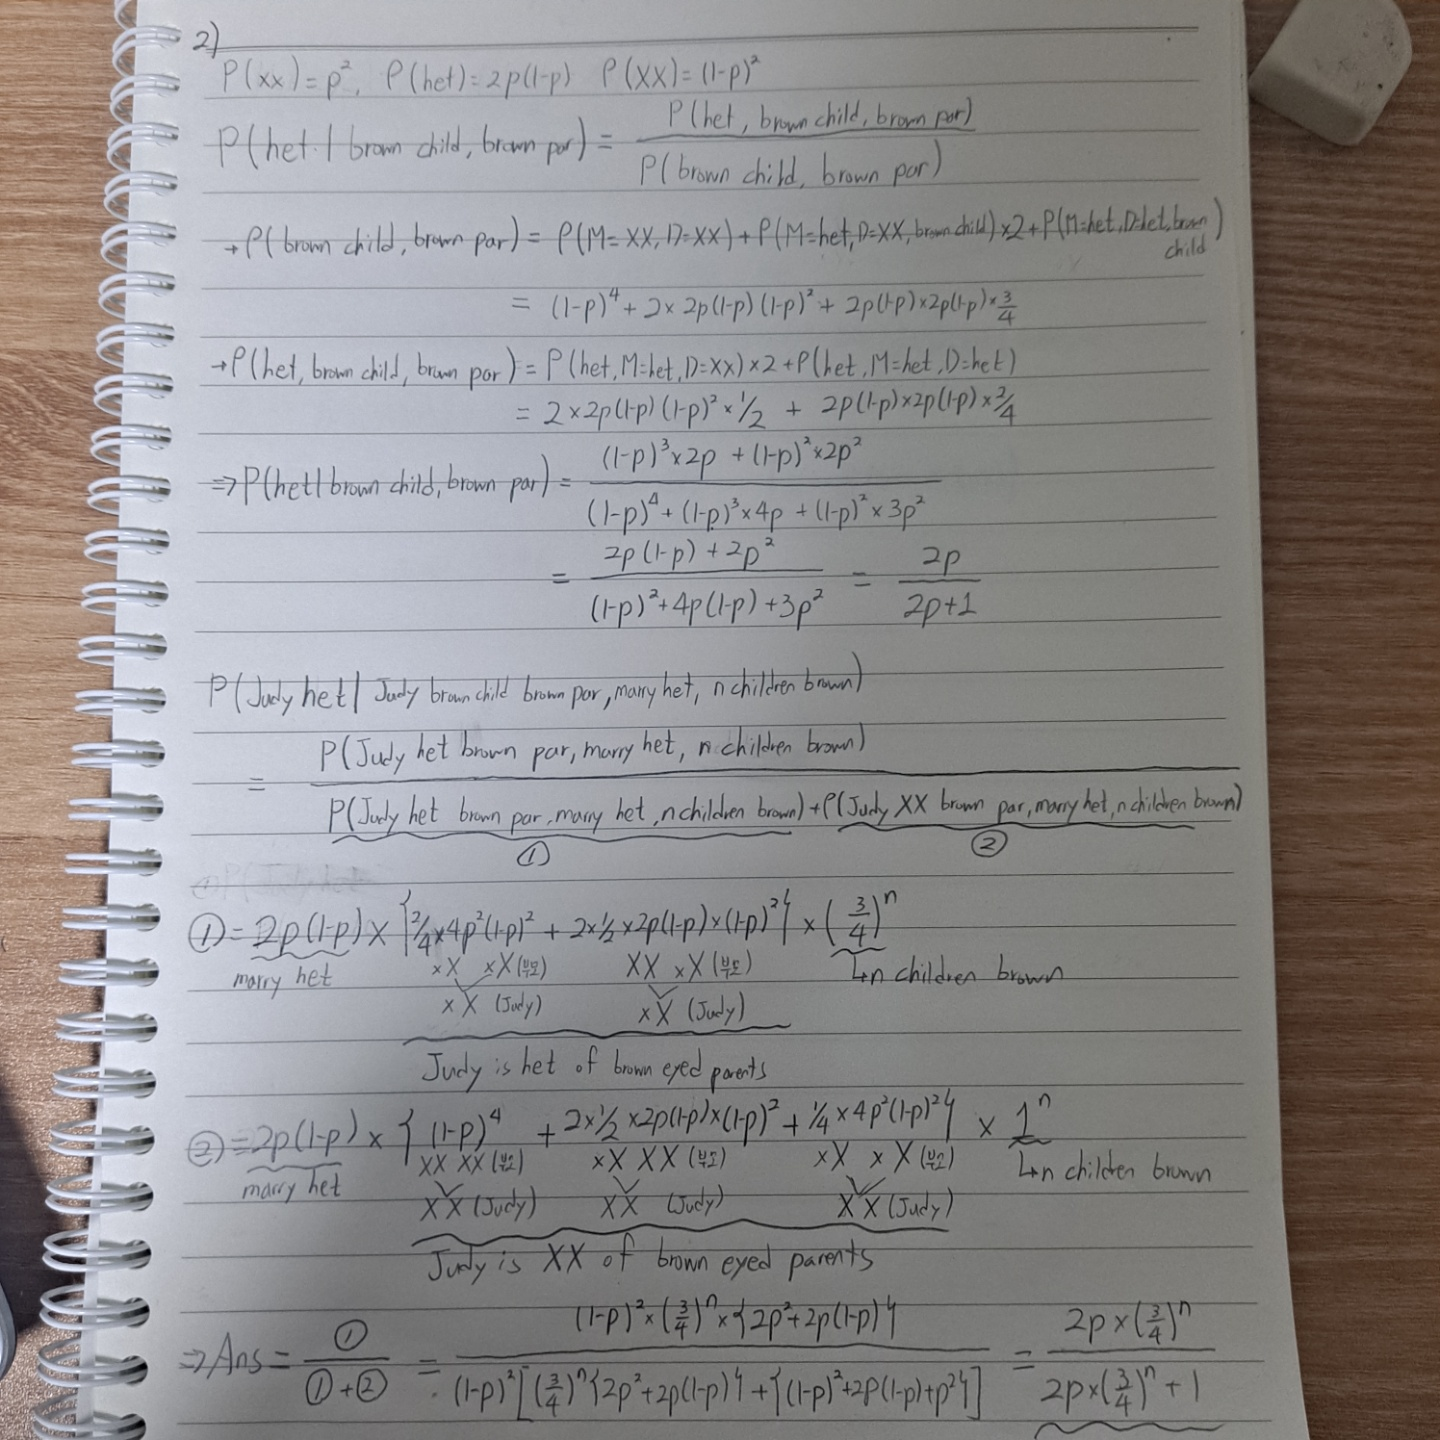

In [14]:
Image("./1주숙제1.jpg")

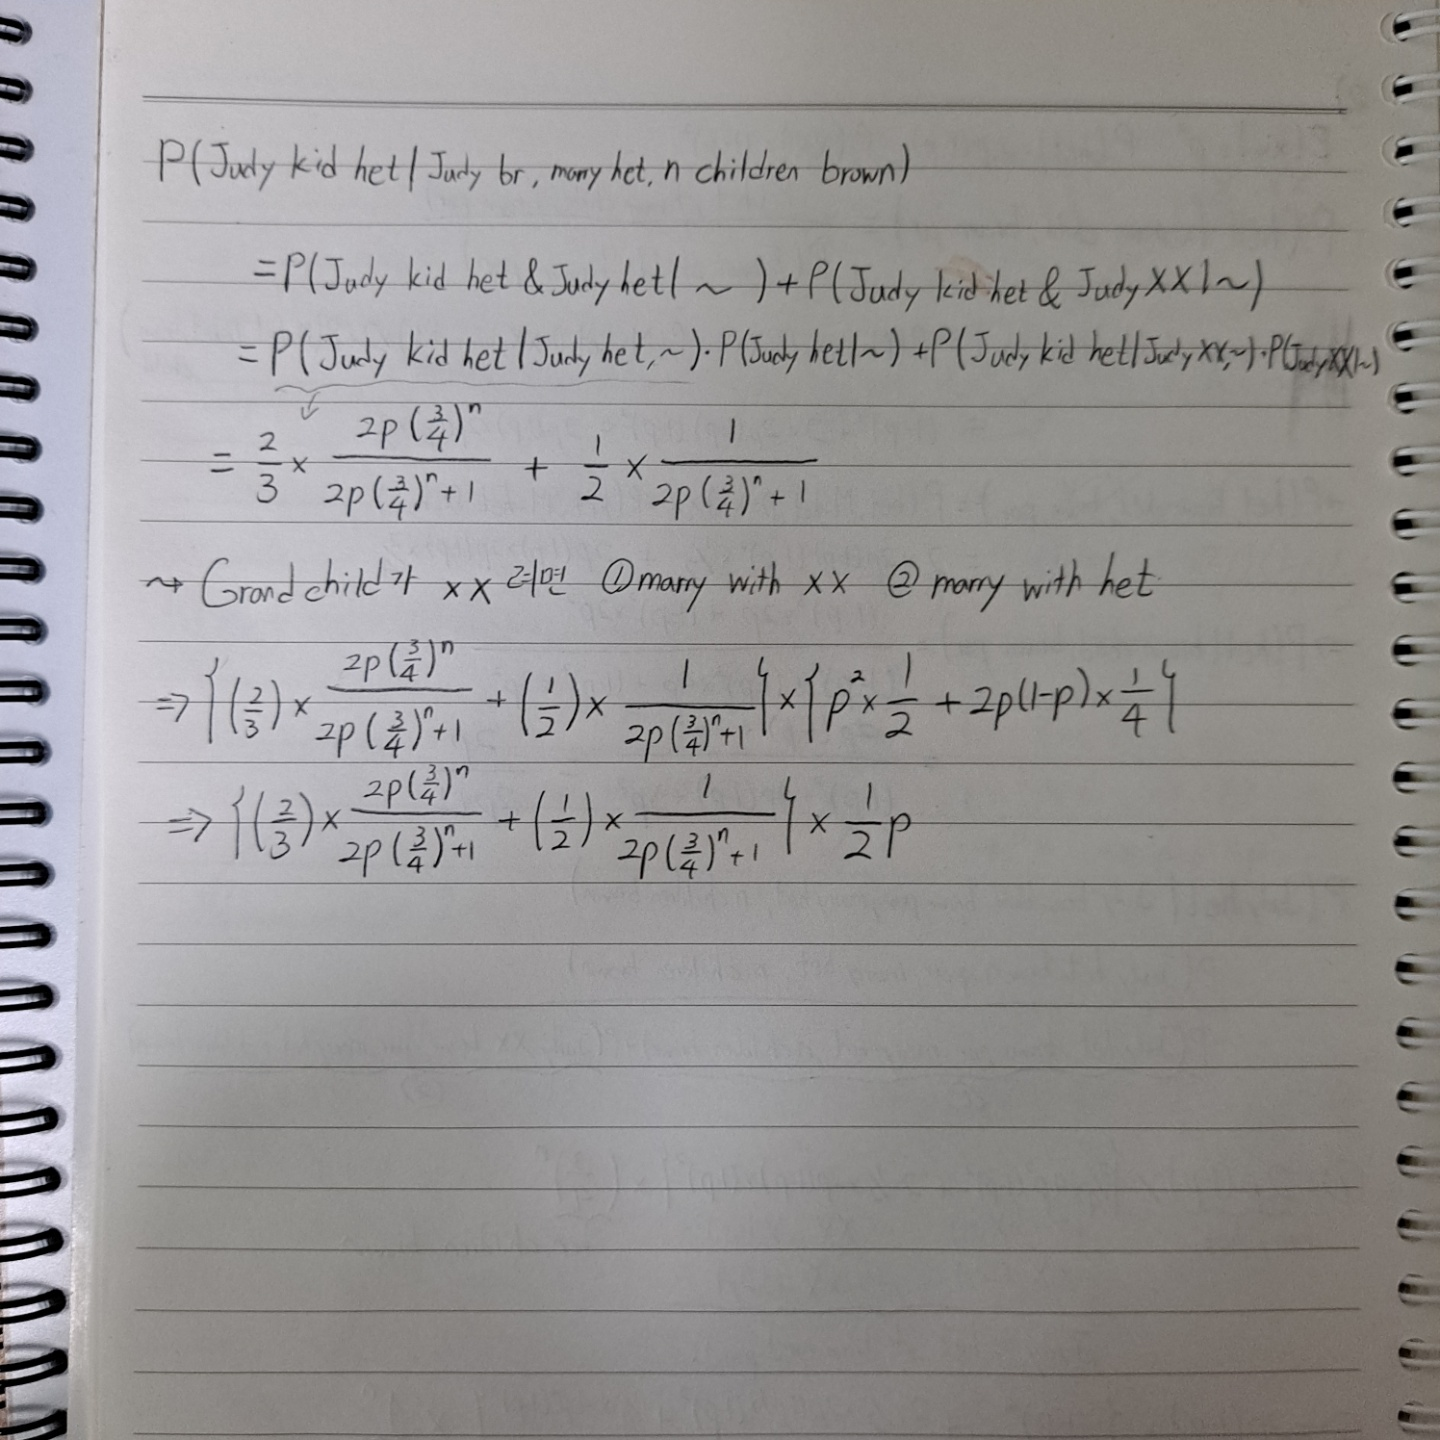

In [15]:
Image("./1주숙제2.jpg")

### 3

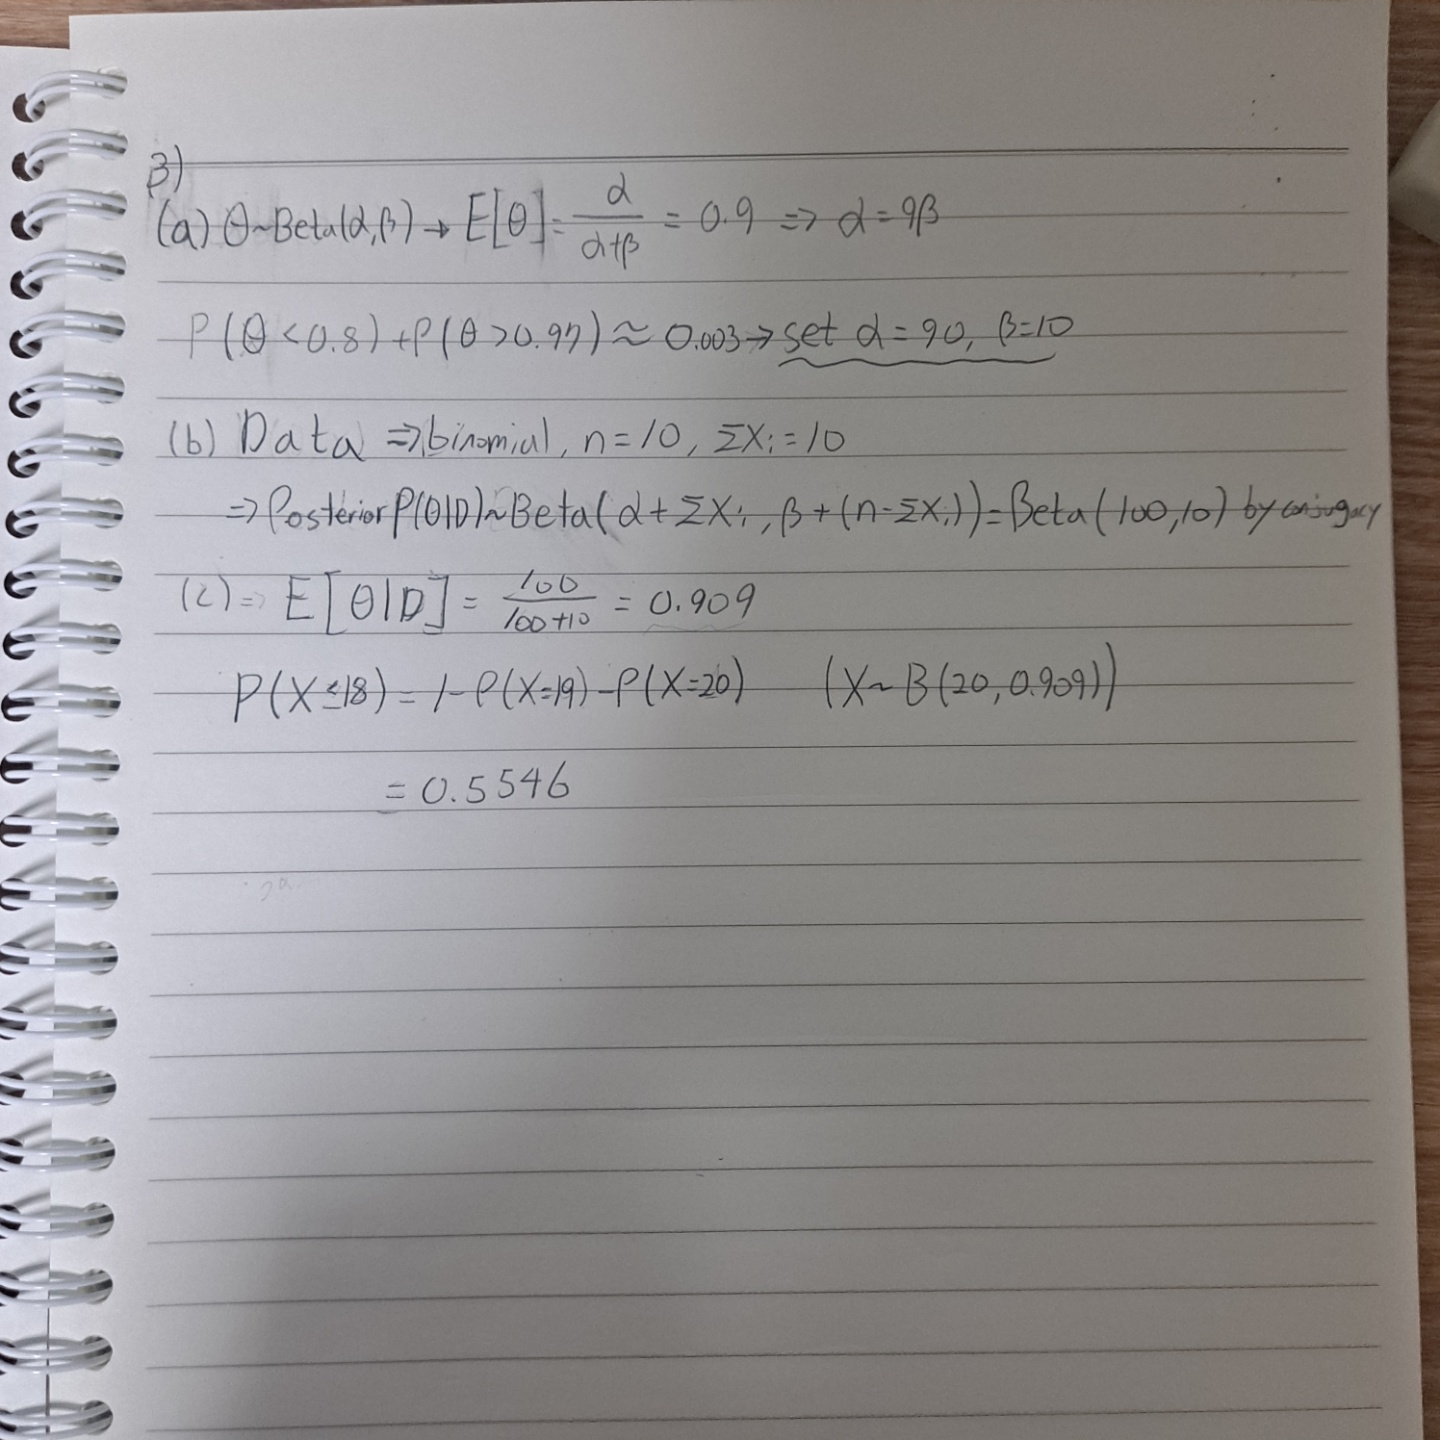

In [16]:
Image("./1주숙제3.jpg")